<a href="https://colab.research.google.com/github/Vineet1615/lung_cancer_detection/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Read csv file

In [14]:
data=pd.read_csv("/content/USA_Housing_dataset.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


## Drop address column

In [15]:
data=data.drop(['Address'],axis=1)

In [16]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


## Check for missing data

<Axes: >

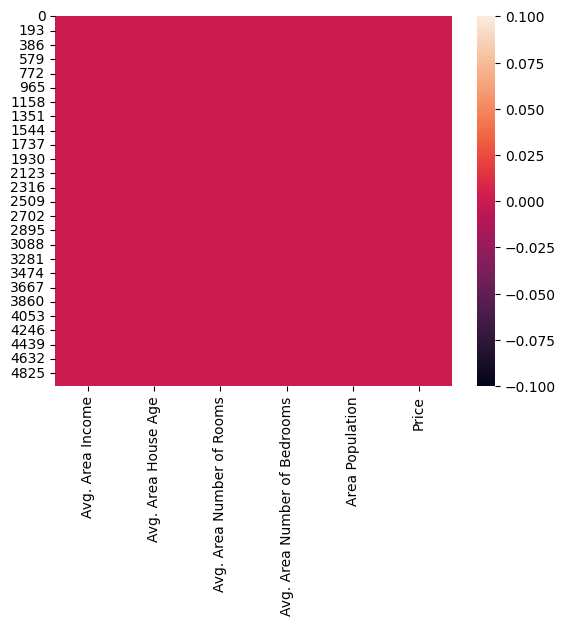

In [17]:
sns.heatmap(data.isnull())

## Train test Split

In [18]:
x=data.drop("Price",axis=1)
y=data['Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Training and Prediction

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
predictions=model.predict(x_test)

In [21]:
predictions

array([1500656.13335571, 1347280.63603115,  735169.88423475, ...,
       1455730.6767189 , 1500423.45092214, 1055634.66667539])

## Evaluation

In [22]:
error=np.sqrt(metrics.mean_absolute_error(y_test,predictions))

In [23]:
error

np.float64(286.4880800410025)

In [24]:
test_indices = [25, 75, 99, 189, 250]

print("\n--- MANUAL TESTING VALUES ---\n")

for idx in test_indices:
    # take feature row from x
    input_row = x.iloc[idx]              # x, not X
    input_values = input_row.values.reshape(1, -1)

    # model prediction
    predicted_price = model.predict(input_values)[0]

    # actual price
    actual_price = y.iloc[idx]

    print(f"Test Case (Row {idx})")
    print("Input Values =", list(input_row.values))
    print("Predicted Price =", round(predicted_price,2))
    print("Real Price =", round(actual_price,2))
    print("-" * 60)




--- MANUAL TESTING VALUES ---

Test Case (Row 25)
Input Values = [np.float64(56974.47654), np.float64(8.287562194), np.float64(7.312879971), np.float64(4.33), np.float64(40694.86951)]
Predicted Price = 1471810.48
Real Price = 1453974.51
------------------------------------------------------------
Test Case (Row 75)
Input Values = [np.float64(70848.78866), np.float64(5.28232502), np.float64(6.766444664), np.float64(3.27), np.float64(40458.73587)]
Predicted Price = 1202469.88
Real Price = 1215608.53
------------------------------------------------------------
Test Case (Row 99)
Input Values = [np.float64(66477.26279), np.float64(6.982151725), np.float64(6.038487979), np.float64(2.37), np.float64(32458.9867)]
Predicted Price = 1177796.69
Real Price = 1124635.93
------------------------------------------------------------
Test Case (Row 189)
Input Values = [np.float64(69342.70684), np.float64(5.804686752), np.float64(7.805903702), np.float64(3.36), np.float64(37082.37422)]
Predicted Price

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Plots to visualize

Metrics:
 R2   = 0.9184


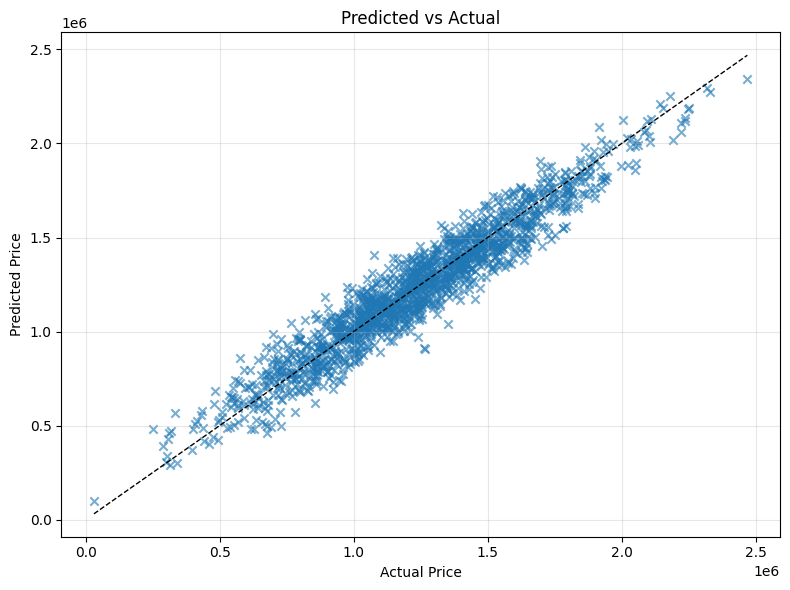

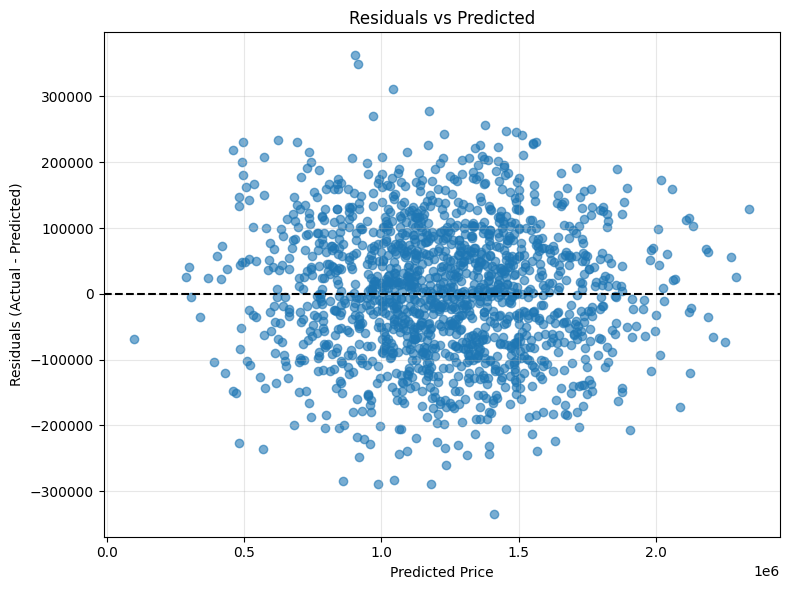

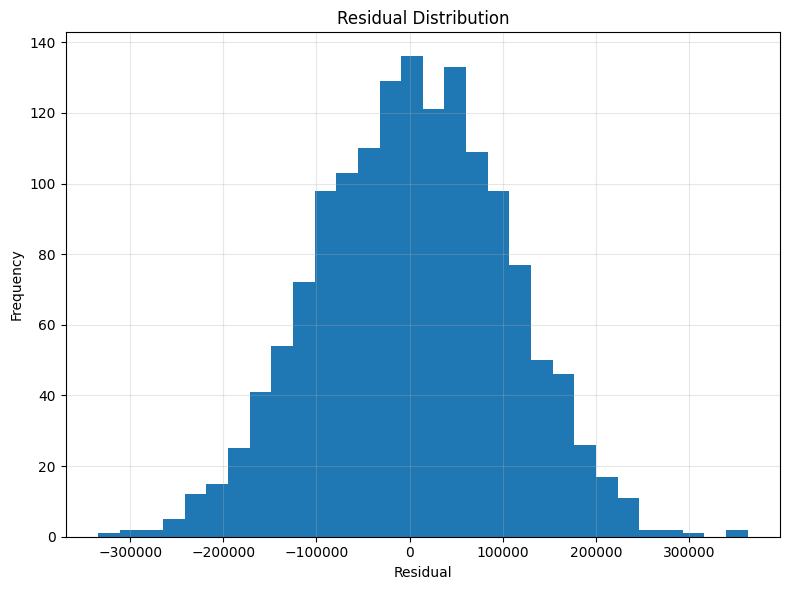

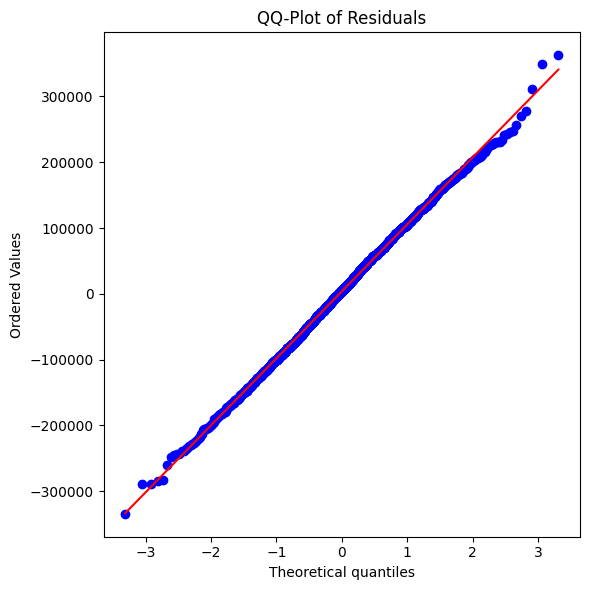

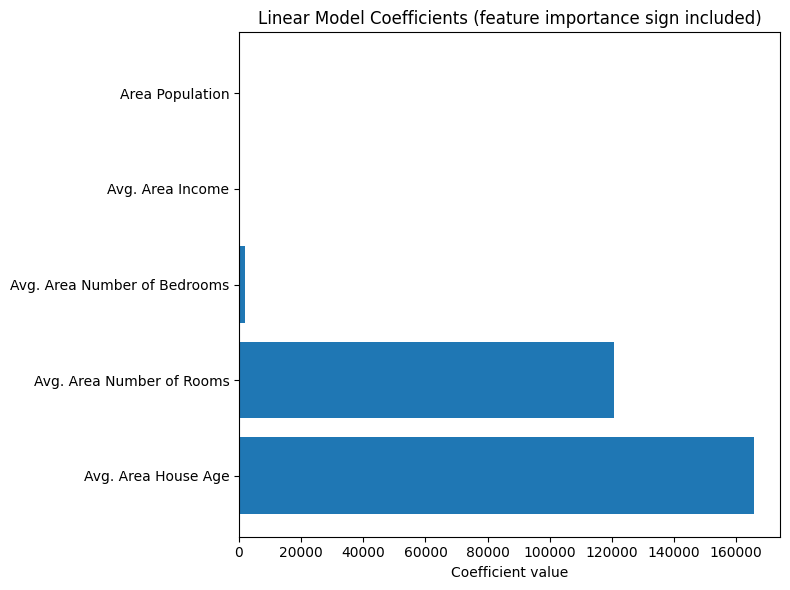

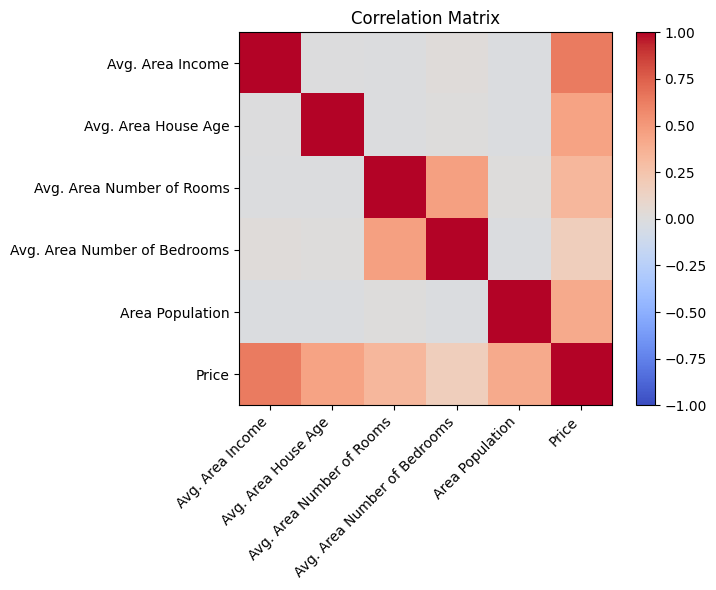

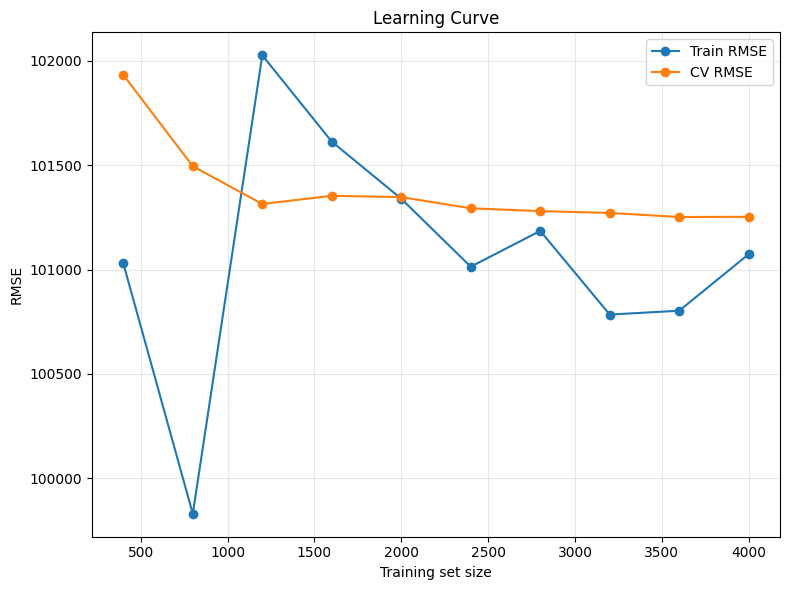

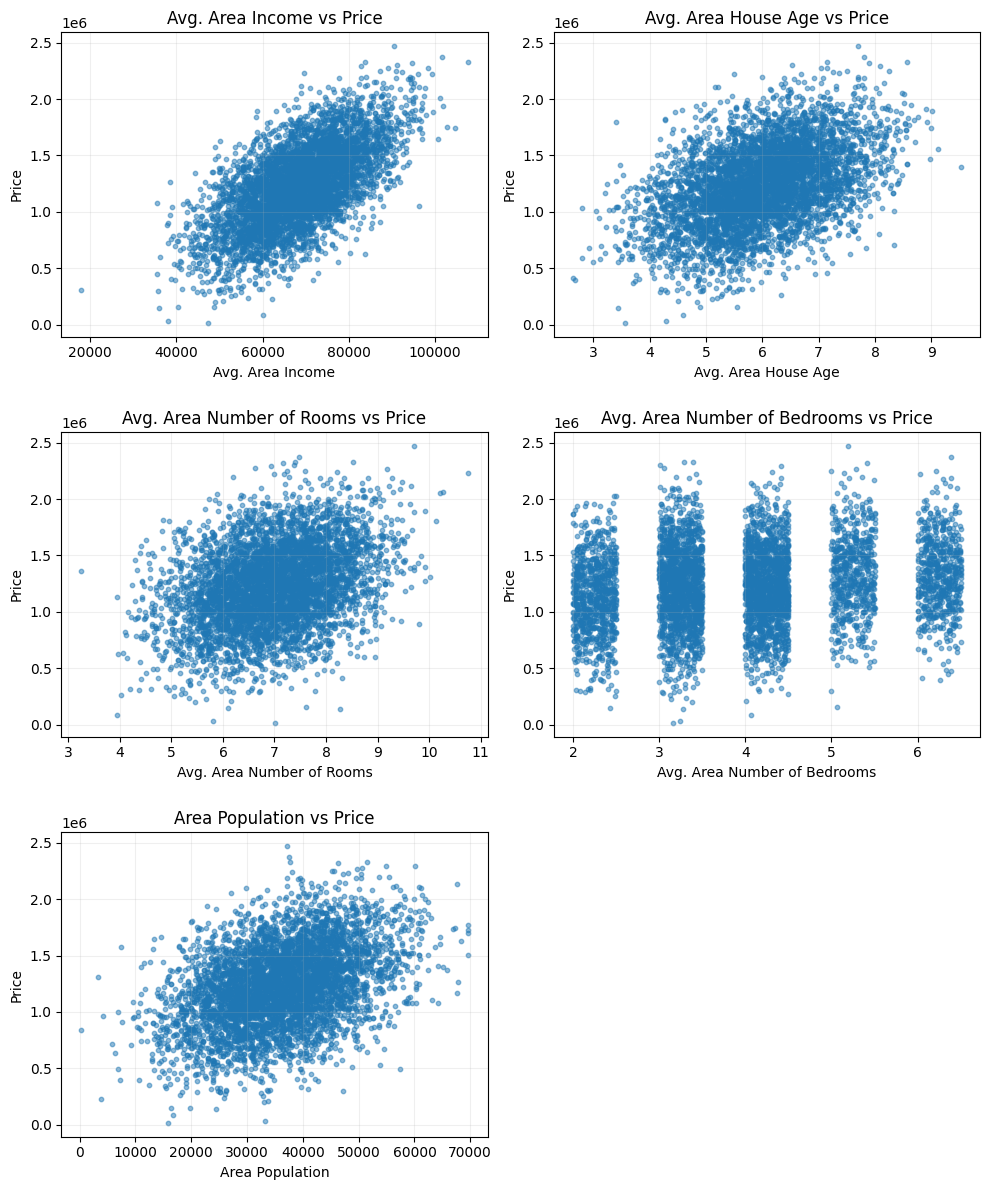

In [27]:
r2 = metrics.r2_score(y_test, predictions)

print("Metrics:")
print(f" R2   = {r2:.4f}")

# ---- 1) Predicted vs Actual ----
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, marker='x')
minv = min(y_test.min(), predictions.min())
maxv = max(y_test.max(), predictions.max())
plt.plot([minv, maxv], [minv, maxv], color='k', linewidth=1, linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual")
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig(os.path.join(OUTPUT_DIR, "pred_vs_actual.png"))
plt.show()

# ---- 2) Residuals vs Predicted ----
residuals = y_test - predictions
plt.figure(figsize=(8,6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig(os.path.join(OUTPUT_DIR, "residuals_vs_pred.png"))
plt.show()

# ---- 3) Residual histogram ----
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig(os.path.join(OUTPUT_DIR, "residual_hist.png"))
plt.show()

# ---- 4) QQ-plot of residuals (normality) ----
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot of Residuals")
plt.tight_layout()
# plt.savefig(os.path.join(OUTPUT_DIR, "residuals_qq.png"))
plt.show()

# ---- 5) Coefficients bar chart ----
coefs = model.coef_
feat_names = x.columns.tolist()
order = np.argsort(np.abs(coefs))[::-1]
plt.figure(figsize=(8,6))
plt.barh([feat_names[i] for i in order], coefs[order])
plt.xlabel("Coefficient value")
plt.title("Linear Model Coefficients (feature importance sign included)")
plt.tight_layout()
# plt.savefig(os.path.join(OUTPUT_DIR, "coefficients.png"))
plt.show()

# ---- 6) Correlation heatmap (numeric features) ----
corr = data.corr(numeric_only=True)
plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
# plt.savefig(os.path.join(OUTPUT_DIR, "correlation_matrix.png"))
plt.show()

# ---- 7) Learning curve (train vs CV) ----
from sklearn.model_selection import learning_curve, KFold

RANDOM_STATE = 42
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), x, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', n_jobs=None)
# convert to RMSE
train_rmse = np.sqrt(-train_scores).mean(axis=1)
val_rmse = np.sqrt(-val_scores).mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_rmse, 'o-', label='Train RMSE')
plt.plot(train_sizes, val_rmse, 'o-', label='CV RMSE')
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig(os.path.join(OUTPUT_DIR, "learning_curve.png"))
plt.show()

# ---- 8) Scatter each feature vs Price (small grid) ----
ncols = 2
nrows = int(np.ceil(len(x.columns)/ncols))
plt.figure(figsize=(10, 4*nrows))
for i, col in enumerate(x.columns, start=1):
    plt.subplot(nrows, ncols, i)
    plt.scatter(x[col], y, alpha=0.5, s=10)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"{col} vs Price")
    plt.grid(alpha=0.2)
plt.tight_layout()
# plt.savefig(os.path.join(OUTPUT_DIR, "features_vs_price_grid.png"))
plt.show()

# print(f"Saved plots to folder: {OUTPUT_DIR}")